In [1]:
# initiating gpu using tensorflow.
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
config.log_device_placement = True
sess = tf.Session(config=config)
set_session(sess)

Using TensorFlow backend.


In [2]:

#importing libraries for the data processing and model.
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from scipy import misc
from keras.models import load_model
%matplotlib inline

In [3]:
import os
print(os.listdir("../input"))

['imgs']


In [4]:
# defining the path and classes.
directory = '../input/imgs/train'
test_directory = '../input/imgs/test/'
random_test = '../input/imgs/driver/'

classes = ['c0','c1','c2','c3','c4','c5','c6','c7','c8','c9']

classes_d = {'c0': 'safe driving',    'c1': 'texting - right',    'c2': 'talking on the phone - right',    'c3': 'texting - left',
            'c4': 'talking on the phone - left',    'c5': 'operating the radio',    'c6': 'drinking',    'c7': 'reaching behind',
             'c8': 'hair and makeup',    'c9': 'talking to passenger',}

In [5]:
# defining a shape to be used for our models.
img_size1 = 240
img_size2 = 240

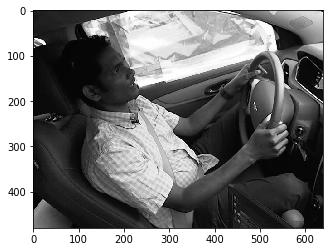

In [6]:
# Train class image for display.
for i in classes:
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

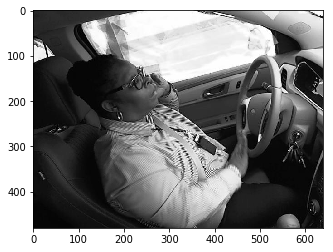

In [7]:
# Test class image for display.
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
    test_array = img_array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [8]:
# checkking image size using shape.
print(img_array.shape)

(480, 640)


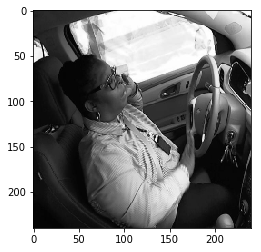

In [9]:
# trying out the resize image functionality
new_img = cv2.resize(test_array,(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()

In [10]:
# creating a training dataset.
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([
                new_img,class_num])

In [11]:
# Creating a test dataset.
testing_data = []
i = 0
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,
            new_img])

In [12]:
create_training_data()

In [13]:
create_testing_data()

In [14]:
print(len(training_data))
print(len(testing_data))

22424
79726


In [15]:
random.shuffle(training_data)

In [16]:
x = []
y = []

In [17]:
for features, label in training_data:
    x.append(features)
    y.append(label)

In [18]:
x[0].shape

(240, 240)

In [19]:
len(x)

22424

In [20]:
X = np.array(x).reshape(-1,img_size2,img_size1,1)

X[0].shape

(240, 240, 1)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [22]:
Y_train = np_utils.to_categorical(y_train,num_classes=10)
Y_test = np_utils.to_categorical(y_test,num_classes=10)

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(240,240,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units = 512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(units = 128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 238, 238, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 238, 238, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 119, 119, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 119, 119, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 119, 119, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 119, 119, 64)      256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 60, 60, 64)        0         
__________

In [26]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [27]:
callbacks = [EarlyStopping(monitor='val_acc',patience=5)]

In [28]:
batch_size = 50
n_epochs = 20

In [29]:
results = model.fit(x_train,Y_train,batch_size=batch_size,epochs=n_epochs,verbose=1,validation_data=(x_test,Y_test),callbacks=callbacks)

Train on 15696 samples, validate on 6728 samples
Epoch 1/20
15696/15696 [==============================] - 47s 3ms/step - loss: 0.8269 - acc: 0.7375 - val_loss: 0.1312 - val_acc: 0.9679
Epoch 2/20
15696/15696 [==============================] - 39s 2ms/step - loss: 0.1426 - acc: 0.9549 - val_loss: 0.0776 - val_acc: 0.9770
Epoch 3/20
15696/15696 [==============================] - 39s 2ms/step - loss: 0.0970 - acc: 0.9704 - val_loss: 0.0561 - val_acc: 0.9829
Epoch 4/20
15696/15696 [==============================] - 39s 2ms/step - loss: 0.0664 - acc: 0.9783 - val_loss: 0.1348 - val_acc: 0.9593
Epoch 5/20
15696/15696 [==============================] - 38s 2ms/step - loss: 0.0730 - acc: 0.9761 - val_loss: 0.0471 - val_acc: 0.9853
Epoch 6/20
15696/15696 [==============================] - 38s 2ms/step - loss: 0.0634 - acc: 0.9790 - val_loss: 0.0655 - val_acc: 0.9786
Epoch 7/20
15696/15696 [==============================] - 38s 2ms/step - loss: 0.0403 - acc: 0.9864 - val_loss: 0.0401 - val_acc:

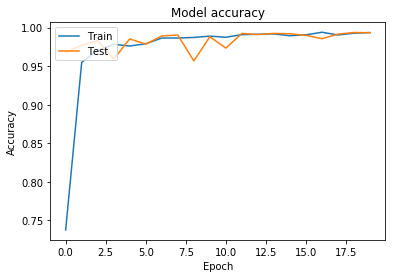

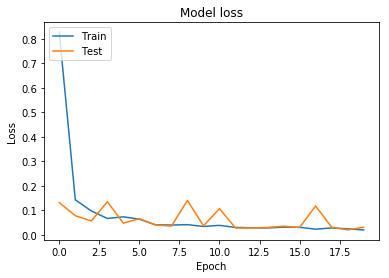

In [30]:
# Plot training & validation accuracy values
plt.plot(results.history['acc'])
plt.plot(results.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
preds = model.predict(np.array(testing_data[0][1]).reshape(-1,img_size2,img_size1,1))

In [32]:
# serialize model to JSON

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5

model.save_weights('../driverdistraction_lr_weights.h5', overwrite=True)

In [33]:
model.save('../driverdistraction_lr_weights.h5')

In [34]:
import os
print(os.listdir("../input"))

['imgs']


In [35]:
loaded_model = load_model('../driverdistraction_lr_weights.h5')

In [36]:
test_data = np.array(testing_data[6000][1]).reshape(-1,img_size2,img_size1,1)

In [37]:
preds = loaded_model.predict(test_data)
preds

array([[3.2823124e-08, 2.8339415e-05, 8.0909273e-03, 2.2410216e-11,
        2.4083262e-08, 3.0979504e-07, 3.2603118e-06, 9.9185395e-01,
        2.1022961e-05, 2.0674765e-06]], dtype=float32)

Predicted:  reaching behind


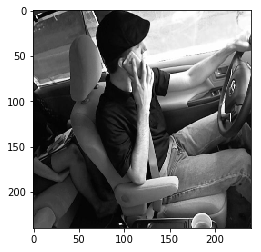

In [38]:
import pandas as pd

print('Predicted: ',classes_d[classes[pd.to_numeric(format(np.argmax(preds)))]])
new_img = cv2.resize(testing_data[6000][1],(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()